# **Data Set**
The plant disease detection dataset is a comprehensive collection of images is labeled with information about the plant and the specific disease affecting it.

We are using two different type of data sets for plant leaf disease detection :
Here, the dataset is mounted from the drive link :

1.   Data_Set 1 : **3 classes -> " Healthy, Powdery, Rusty " divided into 1322 training, 150 testing and 60 validation images.**
*   Kaggle -[Kaggle-plant-disease-recognition-dataset](https://www.kaggle.com/datasets/rashikrahmanpritom/plant-disease-recognition-dataset)
*   Drive - [Drive-plant-disease-recognition-dataset](https://drive.google.com/drive/folders/1FIqksftIEzSAnGNt7SuQdf2A_fJVnMQl?usp=sharing)


2.   Data_Set 2 : **38 classes, divided into 70329 training, 74 testing and 17421 validation images.**
*   Kaggle -[Kaggle-new-plant-disease-recognition-dataset](https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset)
*   Drive - [Drive-new-plant-disease-recognition-dataset](https://drive.google.com/drive/folders/1E_psgnINR3jwNUIO_saXjYgLPz7GYq4G)



In [1]:
#mounting from drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#importing dataset from drive
dataset_folder_path = '/content/drive/MyDrive/Plant_disease_dataset'

# **Importing Essential libraries**

In [3]:
import os # Used for file and directory manipulation.
import numpy as np # Support for arrays, matrices, and mathematical functions.
import pandas as pd # Data manipulation operations for working with structured data.
import matplotlib.pyplot as plt # Functions for generating plots, charts, histograms, scatterplots, and more.
import seaborn as sns

# sklearn: Scikit-learn provides tools for classification, regression, clustering, and more.
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

# tensorflow : Used for building and training deep learning models.
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array,load_img
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


# **Data Preprocessing**
It involves several key steps to ensure the data is appropriately formatted and prepared for training a machine learning model. Typical preprocessing steps are **Data collection, Image resizing, Data Augmentation, Normalization, Splitting the dataset, label encoding, data loading** and more.


In [4]:
# Define data directory paths
train_dir = '/content/drive/MyDrive/Plant_disease_dataset/Train/Train'
test_dir = '/content/drive/MyDrive/Plant_disease_dataset/Test'
validate_dir = '/content/drive/MyDrive/Plant_disease_dataset/Validation/Validation'

In [5]:
# Define image dimensions and batch size
img_width, img_height = 256,256
batch_size = 32 # Number of samples used in each iteration of training

In [6]:
# Data augmentation
datagen = ImageDataGenerator(rescale=1./255,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True)

training_set = datagen.flow_from_directory(train_dir,
                                           target_size = (img_width, img_height),
                                           batch_size = batch_size,
                                           class_mode ='categorical')

validation_set = datagen.flow_from_directory(validate_dir,
                                            target_size = (img_width, img_height),
                                            batch_size = batch_size,
                                            class_mode ='categorical')

testing_set = datagen.flow_from_directory(test_dir,
                                            target_size = (img_width, img_height),
                                            batch_size = batch_size,
                                            class_mode ='categorical')

Found 1322 images belonging to 3 classes.
Found 60 images belonging to 3 classes.
Found 150 images belonging to 3 classes.


# **Data Visualization**

In [7]:
# EDA (Exploratory Data Analysis)
os.listdir("/content/drive/MyDrive/Plant_disease_dataset/Train/Train")

['Powdery', 'Healthy', 'Rust']

In [8]:
# Data Loading and Label Encoding
train_num_classes = len(training_set.class_indices)
validation_num_classes = len(validation_set.class_indices)
test_num_classes = len(testing_set.class_indices)


In [9]:
print(train_num_classes)
print(validation_num_classes)
print(test_num_classes)

3
3
3


In [10]:
class_dictionary = training_set.class_indices
print(class_dictionary)

{'Healthy': 0, 'Powdery': 1, 'Rust': 2}


In [11]:
li = list(class_dictionary.keys())
print(li)

['Healthy', 'Powdery', 'Rust']


In [12]:
t_img, label = training_set.next()

In [13]:
t_img.shape

(32, 256, 256, 3)

In [14]:
# Plot image function
def plotimage(img_arr, label) :
  for im, l in zip(img_arr, label) :
    plt.figure(figsize=(4,4))
    plt.imshow(im)
    plt.show()

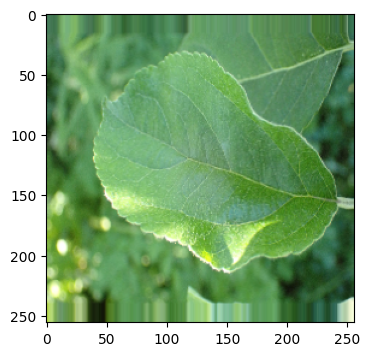

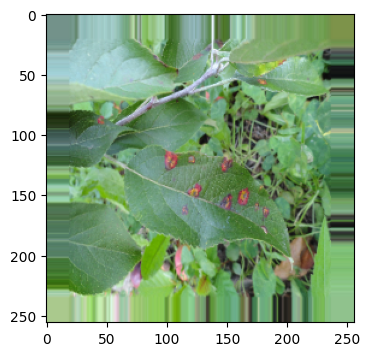

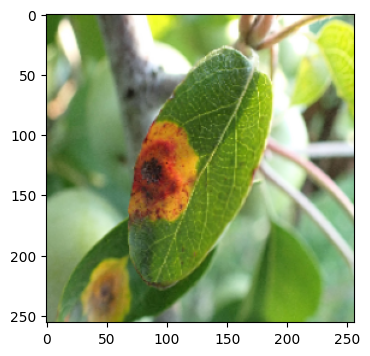

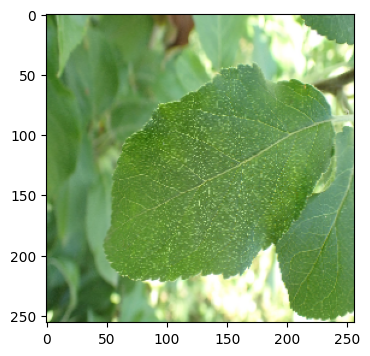

In [15]:
plotimage(t_img[:4], label[:4])

In [16]:
train_num = training_set.samples
valid_num = validation_set.samples
test_num = testing_set.samples
# train_num = 1322
# valid_num = 60
# test_num = 150

In [17]:
print(train_num)
print(valid_num)
print(test_num)

1322
60
150


# **Building our Model**
Building a Convolutional Neural Network (CNN) involves stacking different layers to create a deep learning model capable of learning hierarchical representations of data.

1. VGG19 (Pre-trained) Model

In [18]:
# Building VGG19(Pre-Trained) model
vgg_base_model = VGG19(include_top = False, input_shape=(256, 256, 3))

80134624/80134624 [==============================] - 0s 0us/step


In [19]:
for layer in vgg_base_model.layers:
  layer.trainable = False

In [20]:
vgg_base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [21]:
from keras.models import Model

X = Flatten()(vgg_base_model.output)
X = Dense(units = 3, activation='softmax')(X)

# Creating our model
vgg_model = Model(vgg_base_model.input, X)

In [22]:
vgg_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [23]:
# Compile the model
vgg_model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
early_stop = EarlyStopping(monitor='val_accuracy',
                           min_delta = 0.01,
                           patience=3,
                           verbose=1,)

model_checkpoint = ModelCheckpoint('best_model_vgg.h5',
                                   monitor='val_accuracy',
                                   min_delta = 0.01,
                                   verbose=1,
                                   save_best_only=True)

# Train the model
history_vgg = vgg_model.fit_generator(training_set,
                                  steps_per_epoch = 16,
                                  epochs = 10,
                                  validation_data = validation_set,
                                  validation_steps = 1,
                                  callbacks = [early_stop, model_checkpoint])

<ipython-input-23-9ef7ca28dc72>:19: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_vgg = vgg_model.fit_generator(training_set,


Epoch 1/10
16/16 [==============================] - ETA: 0s - loss: 2.0050 - accuracy: 0.4531
Epoch 1: val_accuracy improved from -inf to 0.78125, saving model to best_model_vgg.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


16/16 [==============================] - 165s 10s/step - loss: 2.0050 - accuracy: 0.4531 - val_loss: 0.7261 - val_accuracy: 0.7812
Epoch 2/10
16/16 [==============================] - ETA: 0s - loss: 0.7956 - accuracy: 0.6837
Epoch 2: val_accuracy did not improve from 0.78125
16/16 [==============================] - 88s 5s/step - loss: 0.7956 - accuracy: 0.6837 - val_loss: 0.4389 - val_accuracy: 0.7812
Epoch 3/10
16/16 [==============================] - ETA: 0s - loss: 0.4078 - accuracy: 0.8551
Epoch 3: val_accuracy improved from 0.78125 to 0.93750, saving model to best_model_vgg.h5
16/16 [==============================] - 80s 5s/step - loss: 0.4078 - accuracy: 0.8551 - val_loss: 0.2550 - val_accuracy: 0.9375
Epoch 4/10
16/16 [==============================] - ETA: 0s - loss: 0.3788 - accuracy: 0.8613
Epoch 4: val_accuracy did not improve from 0.93750
16/16 [==============================] - 58s 4s/step - loss: 0.3788 - accuracy: 0.8613 - val_loss: 0.3709 - val_accuracy: 0.8750
Epoch 5/

2. Sequential Model

In [24]:
# Building Sequential model
s_model = Sequential()
s_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
s_model.add(MaxPooling2D((2, 2)))
s_model.add(Conv2D(64, (3, 3), activation='relu'))
s_model.add(MaxPooling2D((2, 2)))
s_model.add(Conv2D(128, (3, 3), activation='relu'))
s_model.add(MaxPooling2D((2, 2)))
s_model.add(Flatten())
s_model.add(Dense(128, activation='relu'))
s_model.add(Dense(3, activation='softmax'))  # 3 classes for plant disease classification

In [25]:
s_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [29]:
# Compile the model
s_model.compile(optimizer='adam', # adapts learning rate for each parameter, providing better convergence
              loss='categorical_crossentropy', # Used when the target labels are one-hot encoded.
              metrics=['accuracy'])

# Callbacks
early_stop = EarlyStopping(monitor='val_accuracy',
                           min_delta = 0.01,
                           patience=3, # This parameter specifies the number of epochs with no improvement after which training will be stopped.
                           verbose=1,) # set to 1, it will print messages about early stopping

model_checkpoint = ModelCheckpoint('best_model_seq.h5',
                                   monitor='val_accuracy',
                                   min_delta = 0.01,
                                   patience = 3,
                                   verbose=1,
                                   save_best_only=True)

# Train the model
history_seq = s_model.fit_generator(training_set,
                                  steps_per_epoch = 16,
                                  epochs = 10,
                                  validation_data = validation_set,
                                  validation_steps = 1,
                                  callbacks = [early_stop, model_checkpoint])

<ipython-input-29-7f5cc7f33d1f>:20: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_seq = s_model.fit_generator(training_set,


Epoch 1/10
16/16 [==============================] - ETA: 0s - loss: 0.5155 - accuracy: 0.8145
Epoch 1: val_accuracy improved from -inf to 0.68750, saving model to best_model_seq.h5
16/16 [==============================] - 52s 3s/step - loss: 0.5155 - accuracy: 0.8145 - val_loss: 0.5842 - val_accuracy: 0.6875
Epoch 2/10
16/16 [==============================] - ETA: 0s - loss: 0.3238 - accuracy: 0.9082
Epoch 2: val_accuracy improved from 0.68750 to 0.81250, saving model to best_model_seq.h5
16/16 [==============================] - 44s 3s/step - loss: 0.3238 - accuracy: 0.9082 - val_loss: 0.4300 - val_accuracy: 0.8125
Epoch 3/10
16/16 [==============================] - ETA: 0s - loss: 0.2495 - accuracy: 0.9336
Epoch 3: val_accuracy improved from 0.81250 to 0.87500, saving model to best_model_seq.h5
16/16 [==============================] - 47s 3s/step - loss: 0.2495 - accuracy: 0.9336 - val_loss: 0.2855 - val_accuracy: 0.8750
Epoch 4/10
16/16 [==============================] - ETA: 0s - lo

# **Analysing Training of our model**

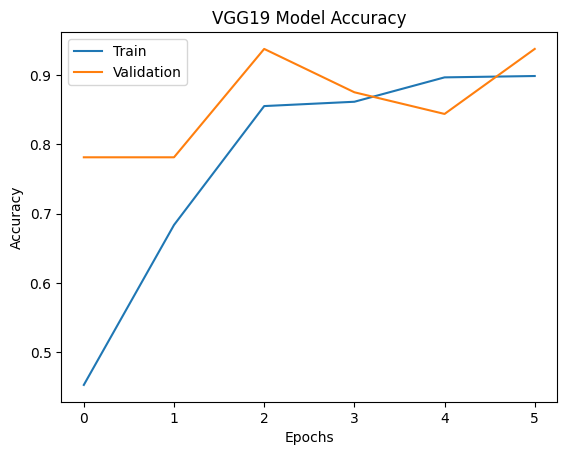

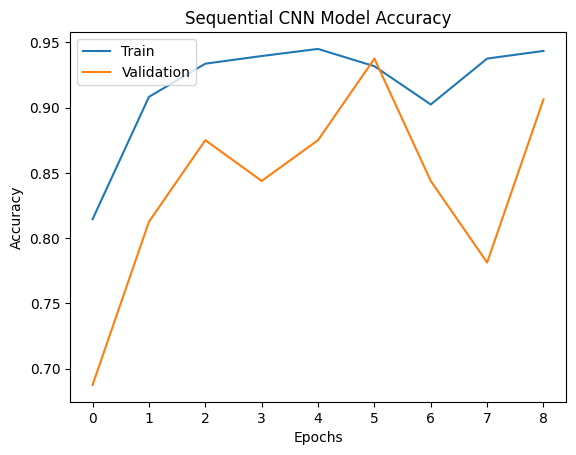

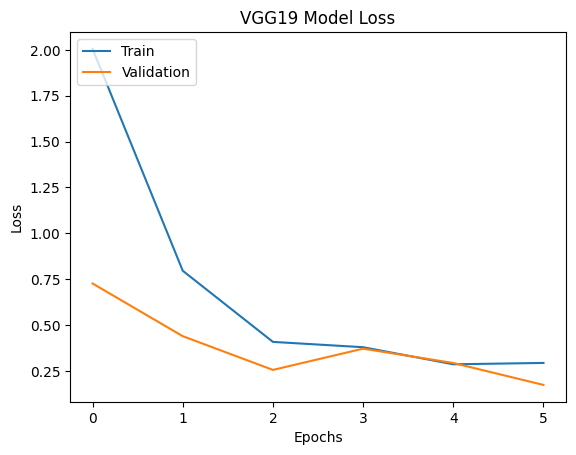

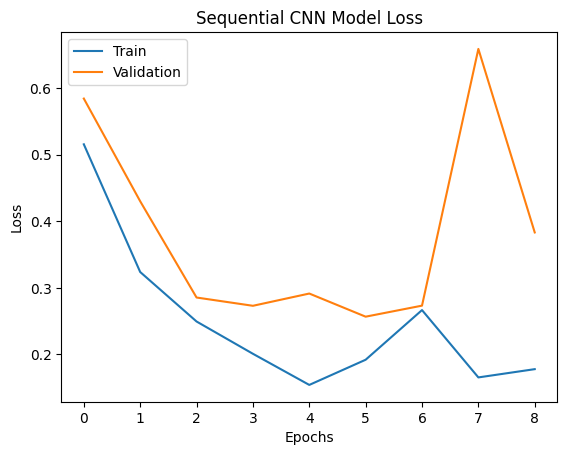

In [30]:
# Comparing VGG19 (Pre-trained) Model and Sequential Model training analysis using graph plots.

# Plotting Training and Validation Accuracy graph
plt.plot(history_vgg.history['accuracy'])
plt.plot(history_vgg.history['val_accuracy'])
plt.title('VGG19 Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history_seq.history['accuracy'])
plt.plot(history_seq.history['val_accuracy'])
plt.title('Sequential CNN Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plotting Training and Validation Loss graph
plt.plot(history_vgg.history['loss'])
plt.plot(history_vgg.history['val_loss'])
plt.title('VGG19 Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history_seq.history['loss'])
plt.plot(history_seq.history['val_loss'])
plt.title('Sequential CNN Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [31]:
vgg_acc = vgg_model.evaluate_generator(validation_set)[1]
seq_acc = s_model.evaluate_generator(validation_set)[1]
print(f"The accuracy of the VGG19 model is = {vgg_acc*100}%")
print(f"The accuracy of the Sequential CNN model is = {seq_acc*100}%")

<ipython-input-31-685ef4b5661c>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  vgg_acc = vgg_model.evaluate_generator(validation_set)[1]
<ipython-input-31-685ef4b5661c>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  seq_acc = s_model.evaluate_generator(validation_set)[1]


The accuracy of the VGG19 model is = 98.33333492279053%
The accuracy of the Sequential CNN model is = 88.33333253860474%


# **Testing the performance of our model**

Following is our prediction:
1/1 [==============================] - 1s 1s/step


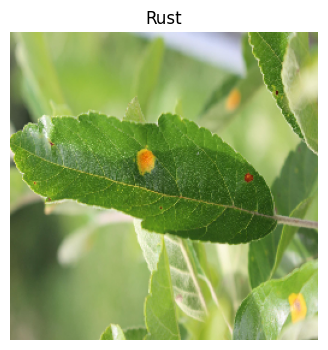

In [32]:
# predicting an image
from keras.preprocessing import image
import numpy as np
image_path = "/content/drive/MyDrive/Plant_disease_dataset/Test/Rust/82f49a4a7b9585f1.jpg"
new_img = image.load_img(image_path, target_size=(256, 256))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
img = img/255

print("Following is our prediction:")
prediction = vgg_model.predict(img)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
d = prediction.flatten()
j = d.max()
for index,item in enumerate(d):
    if item == j:
        class_name = li[index]

#ploting image with predicted class name
plt.figure(figsize = (4,4))
plt.imshow(new_img)
plt.axis('off')
plt.title(class_name)
plt.show()

Following is our prediction:
1/1 [==============================] - 0s 43ms/step


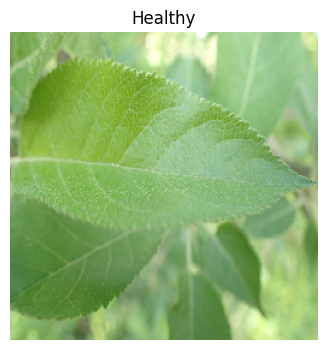

In [36]:
# predicting an image
from keras.preprocessing import image
import numpy as np
image_path = "/content/drive/MyDrive/Plant_disease_dataset/Test/Healthy/8ddaac1bd6c8cd0a.jpg"
new_img = image.load_img(image_path, target_size=(256, 256))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
img = img/255

print("Following is our prediction:")
prediction = s_model.predict(img)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
d = prediction.flatten()
j = d.max()
for index,item in enumerate(d):
    if item == j:
        class_name = li[index]


#ploting image with predicted class name
plt.figure(figsize = (4,4))
plt.imshow(new_img)
plt.axis('off')
plt.title(class_name)
plt.show()

**Confusion Matrix** :

The matrix presents predicted classes in rows and actual classes in columns, allowing easy identification of various types of errors: true positives, false positives, true negatives, and false negatives.


True positives and true negatives represent correct predictions by the model.
False positives are incorrect positive predictions.
False negatives are incorrect negative predictions.


In [37]:
testing_set = datagen.flow_from_directory(test_dir,
                                               target_size=(img_width, img_height),
                                               batch_size=1,  # Set batch size to 1 to iterate over data individually
                                               class_mode='categorical',  # Use categorical since you have 3 classes
                                               shuffle=False)  # Do not shuffle

Found 150 images belonging to 3 classes.


<ipython-input-42-341d89578292>:5: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = vgg_model.predict_generator(testing_set)


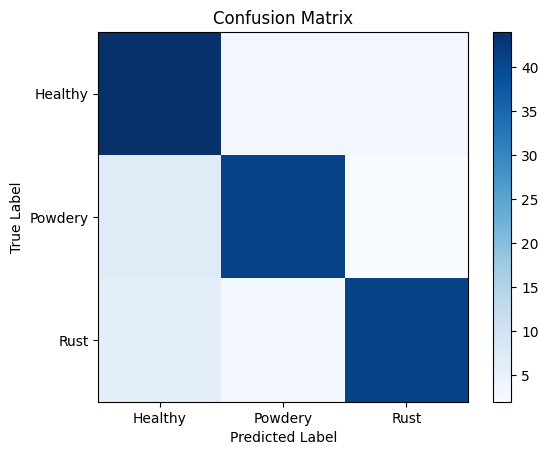

In [42]:
# Get true labels
true_labels = testing_set.classes

# Make predictions
Y_pred = vgg_model.predict_generator(testing_set)

# Convert predictions to class labels
predicted_labels = np.argmax(Y_pred, axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(testing_set.class_indices))
plt.xticks(tick_marks, testing_set.class_indices)
plt.yticks(tick_marks, testing_set.class_indices)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [43]:
# Generate classification report
class_names = list(testing_set.class_indices.keys())
report = classification_report(true_labels, predicted_labels, target_names=class_names)

# Print classification report
print("Classification Report:")
print(report)

# Precision - true positive predictions out of all positive predictions (true positives + false positives).
# Recall - true positive predictions out of all actual positives (true positives + false negatives).
# F1-score - harmonic mean of precision and recall, providing a single metric that balances both metrics.
# Support refers to the number of occurrences of each class in the true responses.

Classification Report:
              precision    recall  f1-score   support

     Healthy       0.77      0.88      0.82        50
     Powdery       0.87      0.82      0.85        50
        Rust       0.89      0.82      0.85        50

    accuracy                           0.84       150
   macro avg       0.85      0.84      0.84       150
weighted avg       0.85      0.84      0.84       150



<ipython-input-44-01adc114b529>:5: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = s_model.predict_generator(testing_set)


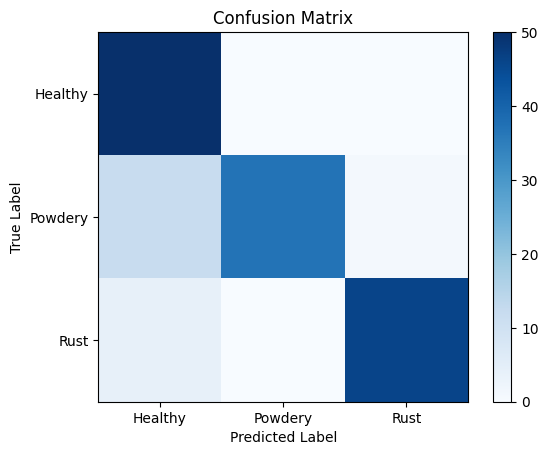

In [44]:
# Get true labels
true_labels = testing_set.classes

# Make predictions
Y_pred = s_model.predict_generator(testing_set)

# Convert predictions to class labels
predicted_labels = np.argmax(Y_pred, axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(testing_set.class_indices))
plt.xticks(tick_marks, testing_set.class_indices)
plt.yticks(tick_marks, testing_set.class_indices)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [45]:
# Generate classification report
class_names = list(testing_set.class_indices.keys())
report = classification_report(true_labels, predicted_labels, target_names=class_names)

# Print classification report
print("Classification Report:")
print(report)

# Precision - true positive predictions out of all positive predictions (true positives + false positives).
# Recall - true positive predictions out of all actual positives (true positives + false negatives).
# F1-score - harmonic mean of precision and recall, providing a single metric that balances both metrics.
# Support refers to the number of occurrences of each class in the true responses.

Classification Report:
              precision    recall  f1-score   support

     Healthy       0.76      1.00      0.86        50
     Powdery       1.00      0.74      0.85        50
        Rust       0.98      0.92      0.95        50

    accuracy                           0.89       150
   macro avg       0.91      0.89      0.89       150
weighted avg       0.91      0.89      0.89       150



# **Initializing Other Classifiers**

In [46]:
# Initialize classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
    "K Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "Support Vector Machine": SVC(kernel='linear'),
    "XGBoost": XGBClassifier()
}

In [47]:
# Prepare data for classifiers
X_train, y_train = training_set.next()
X_val, y_val = validation_set.next()

In [48]:
# Reshape data for classifiers
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_val_flat = X_val.reshape(X_val.shape[0], -1)

In [49]:
# Cross-validation and evaluation
results = {'Classifier': [], 'Accuracy': []}
conf_matrices = {}

In [50]:
for name, clf in classifiers.items():
    print(f"Classifier name: {name}")
    print(f"Classifier type: {type(clf)}")

Classifier name: Logistic Regression
Classifier type: <class 'sklearn.linear_model._logistic.LogisticRegression'>
Classifier name: Linear Discriminant Analysis
Classifier type: <class 'sklearn.discriminant_analysis.LinearDiscriminantAnalysis'>
Classifier name: K Nearest Neighbors
Classifier type: <class 'sklearn.neighbors._classification.KNeighborsClassifier'>
Classifier name: Decision Tree
Classifier type: <class 'sklearn.tree._classes.DecisionTreeClassifier'>
Classifier name: Random Forest
Classifier type: <class 'sklearn.ensemble._forest.RandomForestClassifier'>
Classifier name: Gaussian Naive Bayes
Classifier type: <class 'sklearn.naive_bayes.GaussianNB'>
Classifier name: Support Vector Machine
Classifier type: <class 'sklearn.svm._classes.SVC'>
Classifier name: XGBoost
Classifier type: <class 'xgboost.sklearn.XGBClassifier'>


In [51]:
# Comparing the classifiers
for name, clf in classifiers.items():
    # Cross-validation
    cv_scores = cross_val_score(clf, X_train_flat, np.argmax(y_train, axis=1), cv=5)
    avg_cv_score = np.mean(cv_scores)

    # Fitting the model
    clf.fit(X_train_flat, np.argmax(y_train, axis=1))

    # Predictions
    y_pred = clf.predict(X_val_flat)

    # Confusion matrix
    conf_matrices[name] = confusion_matrix(np.argmax(y_val, axis=1), y_pred)

    # Accuracy
    accuracy = accuracy_score(np.argmax(y_val, axis=1), y_pred)

    # Storing results
    results['Classifier'].append(name)
    results['Accuracy'].append(accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modu

In [52]:
# Displaying results
results_df = pd.DataFrame(results)
print("Accuracy of Different Classifiers:")
print(results_df)

Accuracy of Different Classifiers:
                     Classifier  Accuracy
0           Logistic Regression   0.46875
1  Linear Discriminant Analysis   0.65625
2           K Nearest Neighbors   0.37500
3                 Decision Tree   0.40625
4                 Random Forest   0.50000
5          Gaussian Naive Bayes   0.50000
6        Support Vector Machine   0.50000
7                       XGBoost   0.59375


In [53]:
# Displaying Confusion Matrix for each classifier
for name, conf_matrix in conf_matrices.items():
    print("\nConfusion Matrix for", name, "classifier:")
    print(conf_matrix)


Confusion Matrix for Logistic Regression classifier:
[[ 5  4  0]
 [ 1 10  0]
 [ 5  7  0]]

Confusion Matrix for Linear Discriminant Analysis classifier:
[[ 8  1  0]
 [ 0 11  0]
 [10  0  2]]

Confusion Matrix for K Nearest Neighbors classifier:
[[4 5 0]
 [3 8 0]
 [8 4 0]]

Confusion Matrix for Decision Tree classifier:
[[3 5 1]
 [3 7 1]
 [5 4 3]]

Confusion Matrix for Random Forest classifier:
[[ 6  3  0]
 [ 1 10  0]
 [11  1  0]]

Confusion Matrix for Gaussian Naive Bayes classifier:
[[ 7  2  0]
 [ 2  9  0]
 [10  2  0]]

Confusion Matrix for Support Vector Machine classifier:
[[5 4 0]
 [2 9 0]
 [7 3 2]]

Confusion Matrix for XGBoost classifier:
[[ 7  2  0]
 [ 1 10  0]
 [ 9  1  2]]



Confusion Matrix for Logistic Regression classifier:


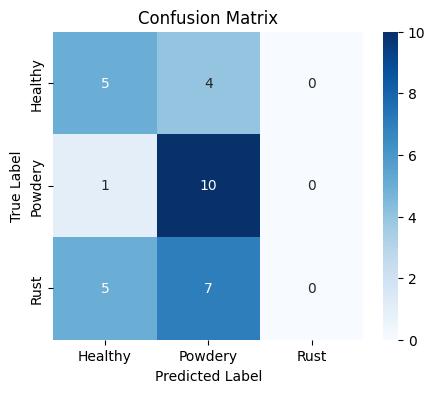


Confusion Matrix for Linear Discriminant Analysis classifier:


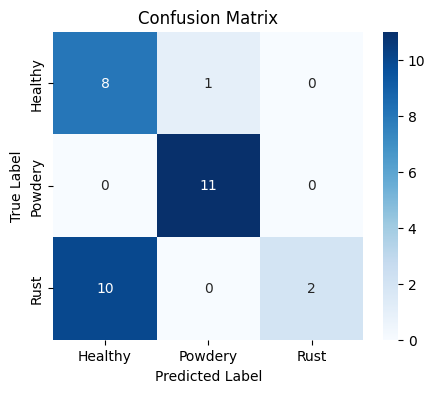


Confusion Matrix for K Nearest Neighbors classifier:


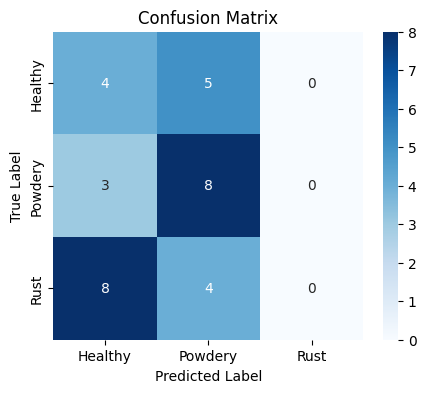


Confusion Matrix for Decision Tree classifier:


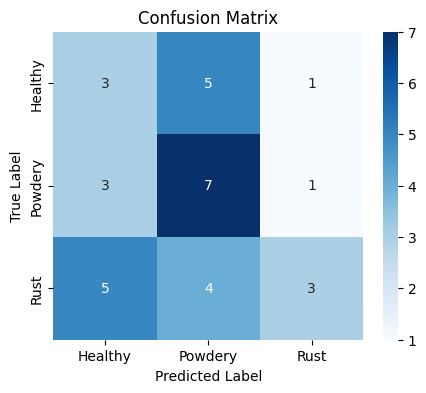


Confusion Matrix for Random Forest classifier:


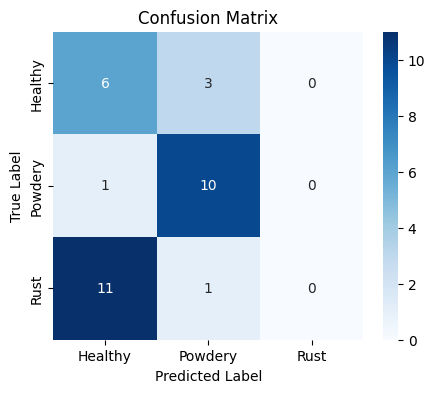


Confusion Matrix for Gaussian Naive Bayes classifier:


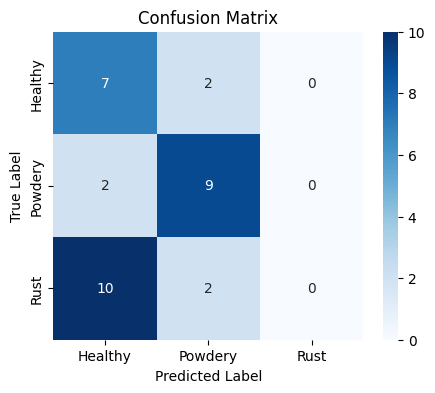


Confusion Matrix for Support Vector Machine classifier:


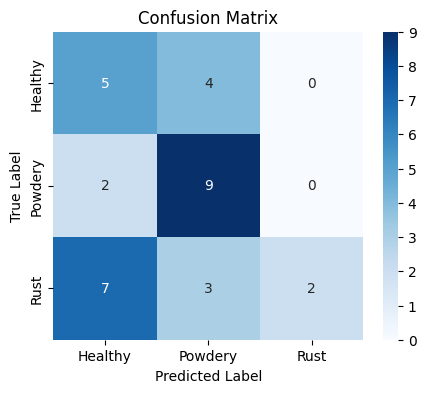


Confusion Matrix for XGBoost classifier:


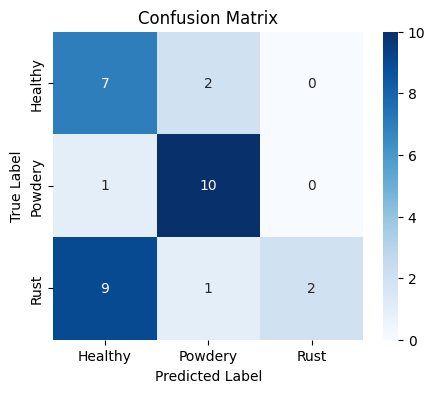

In [54]:
# Plot confusion matrix as heatmap
for name, conf_matrix in conf_matrices.items():
  print("\nConfusion Matrix for", name, "classifier:")
  plt.figure(figsize=(5, 4))
  sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=testing_set.class_indices, yticklabels=testing_set.class_indices)
  plt.title('Confusion Matrix')
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')
  plt.show()